In [430]:
import numpy as np 
import matplotlib.pyplot as plt
# imports the necessary libraries

<h1> Load the datasets and plot some examples</h1>

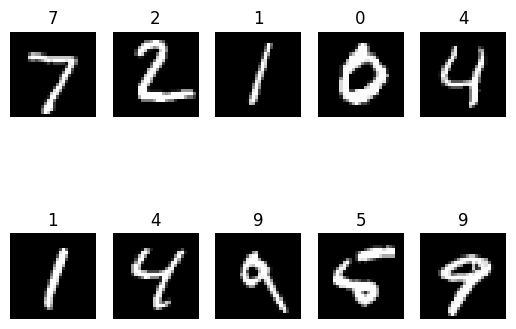

In [431]:
with open("t10k-images.idx3-ubyte", "rb") as f:
    test_images = f.read()

with open("t10k-labels.idx1-ubyte", "rb") as f:
    test_labels = f.read()

with open("train-images.idx3-ubyte", "rb") as f:
    train_images = f.read()

with open("train-labels.idx1-ubyte", "rb") as f:
    train_labels = f.read()

# opens the files and reads them

train_images = np.frombuffer(train_images, dtype=np.uint8, offset=16).reshape(-1, 28, 28)
train_labels = np.frombuffer(train_labels, dtype=np.uint8, offset=8)
test_images = np.frombuffer(test_images, dtype=np.uint8, offset=16).reshape(-1, 28, 28)
test_labels = np.frombuffer(test_labels, dtype=np.uint8, offset=8)

# reshapes the data into a 28x28 matrix

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(test_labels[i])
    plt.axis('off')

plt.show()


In [432]:
X_train = train_images.reshape(-1, 28*28).T
X_test = test_images.reshape(-1, 28*28).T
y_train = train_labels
y_test = test_labels

X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

m_train = X_train.shape[1]
print(f"Our m_train is {m_train}")
m_test = X_test.shape[1]
print(f"Our m_test is {m_test}")
print(28*28)
X_features_train = X_train.shape[0]
print(f"X total features {X_features_train}")
X_features_test = X_test.shape[0]
print(f"X total features {X_features_test}")

num_classes = 10

y_train_encoded = np.zeros((len(y_train), num_classes))
y_train_encoded[np.arange(len(y_train)), y_train] = 1

y_test_encoded = np.zeros((len(y_test), num_classes))
y_test_encoded[np.arange(len(y_test)), y_test] = 1

print("One-hot encoded y_train:")
print(y_train_encoded)

print("\nOne-hot encoded y_test:")
print(y_test_encoded)

Our m_train is 60000
Our m_test is 10000
784
X total features 784
X total features 784
One-hot encoded y_train:
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

One-hot encoded y_test:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<h1> Get the necessary functions to this work properly </h1>

Epoch 0, Loss: 2.302835538008445
Epoch 100, Loss: 2.290454936562869


KeyboardInterrupt: 